# Método de Simpson

In [2]:
using SymPy

In [4]:
using PyPlot

In [8]:
#Defino la función simpson dando como entradas una función f, a y b son el intervalo [a,b] y n es el número de particiones.
function simpson(f,a,b,n)
    
    r=0 #Definimos r para irle sumando las aproximaciones
    h=(b-a)/n                                     

    for i in 1:n #se hace un for para la iteración
        x=(h/6)*(f(a+i*h-h)+4*f(a+i*h-h/2)+f(a+i*h)) # la i nos indica el intervalo 
        r=r+x                                          
    end                                                
    return r                                          
    
end;

In [10]:
simpson(x->2x,4,10,5) #ejemplo con f(x)=2x, [a,b]=[4,10] y n=5

84.0

# Interpolación polinomial en la forma de Lagrange

In [128]:
#Defino la función lagrange dando como entradas x:lista de los xk, y:lista de los yk y c el punto donde evaluamos el polinomio
function lagrange(x,y,c="none")
       
    r=Sym("r") 
    #se define esta variable para posteriormente usar la fórmula para interpolar
    L=0
    #Ponemos lo siguiente para ir guardando los resultados:
    t=[]
    #indicamos el número de puntos:
    q=length(x) 
    
    #hacemos un for para las bases polinomiales:
    for i in 1:q
        p=1 #se define esta variable para las bases.
        
        #De acuerdo a la fórmula le ponemos este otro for pero hasta i-1
        for n in 1:i-1   
            p=p*(r-x[n])/(x[i]-x[n])   
        end
        #ahora para i+1 hasta q
        for n in i+1:q  
            p=p*(r-x[n])/(x[i]-x[n])  
        end
        push!(t,p) 
    end
    #Ahora haremos un for para la funcion L(x) (que es una suma), donde usaremos la variable L que definimos al principio, junto con t[] que nos fue guardando las bases polinomiales:
    for i in 1:q
        L=L+y[i]*t[i]
    end
    
    global L=lambdify(L,[r])    
    
     return L(c)
    
end;

In [129]:
#Para comprobar que funciona, definiremos un x com linspace, una y  como la función y el punto c:
x=linspace(1,10,5)
y=2x.^3
c=x[2] 

3.25

In [130]:
lagrange(x,y,c)

68.65625000000018

### Interpolación de cos(x)

In [131]:
#Definimos el linspace de 0 a 2pi con 30 pasos y a la función
x=linspace(0,2pi,30)
y=cos.(x)

30-element Array{Float64,1}:
  1.0      
  0.976621 
  0.907575 
  0.796093 
  0.647386 
  0.468408 
  0.267528 
  0.0541389
 -0.161782 
 -0.370138 
 -0.561187 
 -0.725995 
 -0.856857 
  ⋮        
 -0.725995 
 -0.561187 
 -0.370138 
 -0.161782 
  0.0541389
  0.267528 
  0.468408 
  0.647386 
  0.796093 
  0.907575 
  0.976621 
  1.0      

In [132]:
c=Sym("c") #Definimos cualquier variable para que sea el punto donde evaluaremos a la función

c

In [145]:
lagrange(x,y,c);

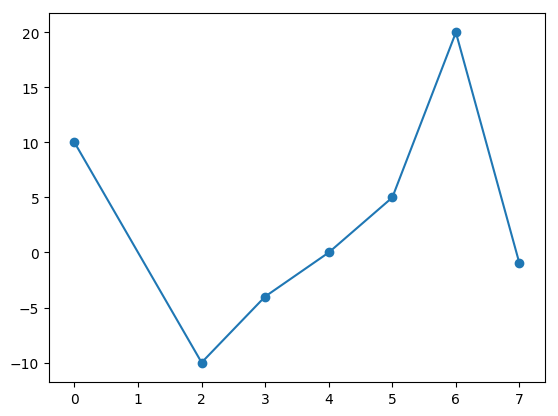

PyObject <matplotlib.collections.PathCollection object at 0x7fd50b0beb90>

In [146]:
plot(x,y)
scatter(x,y) #con scatter se ve más claro en dónde están los puntos

### Interpolación de $cos^{2}(x)$
Se realizará el mismo procedimiento que para cos(x):

In [97]:
x=linspace(0,2pi,30)
y=(cos.(x)).^2
c=Sym("c")

c

In [98]:
lagrange(x,y,c);

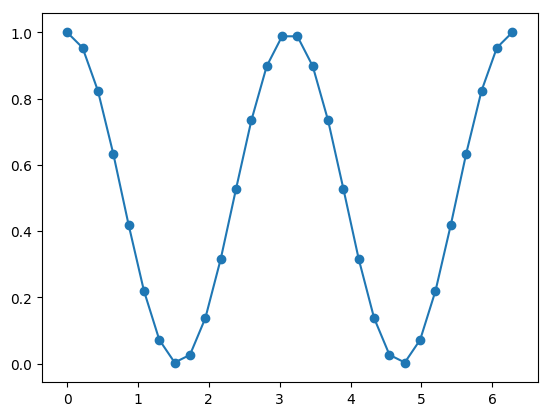

PyObject <matplotlib.collections.PathCollection object at 0x7fd50b9a5e50>

In [99]:
plot(x,y)
scatter(x,y)

### Interpolación de una lista de puntos

Ahora se interpolarán los puntos [(0,10),(2,-10),(3,-4),(4,0),(5,5),(6,20),(7,-1)]

In [136]:
#Definimos ahora a x e y como listas de números con las respectivas entradas de los puntos a interpolar:
x=[0,2,3,4,5,6,7] #estas son las componentes x de cada punto a interpolar
y=[10,-10,-4,0,5,20,-1] #estas son las componentes x de cada punto a interpolar
c=Sym("c")

c

In [137]:
lagrange(x,y,c);

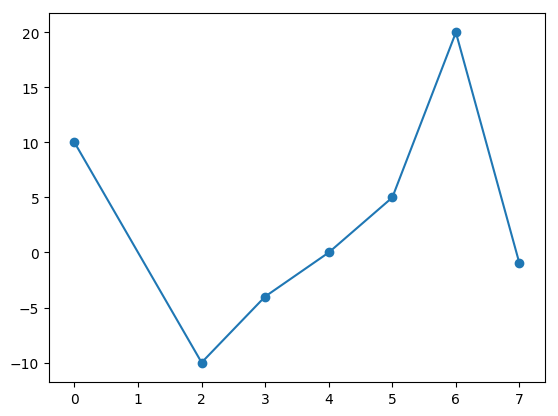

PyObject <matplotlib.collections.PathCollection object at 0x7fd50b5a6990>

In [141]:
plot(x,y)
scatter(x,y)

In [142]:
simplify(lagrange(x,y,Sym("x"))) #esto nos da la ecuación del polinomio interpoladorsimplify(lagrange(x,y,Sym("x"))) #esto nos da la ecuación del polinomio interpolador

       6        5         4         3          2            
  173*x    113*x    4957*x    2731*x    54571*x    83*x     
- ------ + ------ - ------- + ------- - -------- + ---- + 10
   2520      84       504        84       1260      14      